# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 設定 data_path
dir_data = './data/part01/'

### 之前做過的處理

In [2]:
# 讀取資料檔
app_train_file = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(app_train_file)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH'] / 365
app_train['YEARS_BIRTH'].round().value_counts().sort_index()

21.0     660
22.0    1990
23.0    3669
24.0    3815
25.0    4079
26.0    4364
27.0    6413
28.0    8467
29.0    7636
30.0    7776
31.0    8021
32.0    8313
33.0    7729
34.0    7659
35.0    7751
36.0    8152
37.0    8727
38.0    8793
39.0    9023
40.0    8602
41.0    8495
42.0    8308
43.0    8265
44.0    8132
45.0    7385
46.0    7333
47.0    7202
48.0    6907
49.0    6786
50.0    6696
51.0    6417
52.0    6740
53.0    7124
54.0    7489
55.0    7140
56.0    6657
57.0    6926
58.0    6371
59.0    6479
60.0    6612
61.0    5795
62.0    5362
63.0    5467
64.0    5023
65.0    4318
66.0    2641
67.0    1834
68.0    1654
69.0     314
Name: YEARS_BIRTH, dtype: int64

In [6]:
bins_cut = [i * 5 for i in range(4, 15)]
app_train['YEARS_BIRTH_BINNED'] = pd.cut(app_train['YEARS_BIRTH'], bins=bins_cut, right=False)
app_train['YEARS_BIRTH_BINNED'].value_counts().sort_index()

[20, 25)    12150
[25, 30)    32850
[30, 35)    39439
[35, 40)    42860
[40, 45)    41416
[45, 50)    35127
[50, 55)    34942
[55, 60)    33132
[60, 65)    27473
[65, 70)     8122
Name: YEARS_BIRTH_BINNED, dtype: int64

In [7]:
app_train_group = app_train.groupby(['YEARS_BIRTH_BINNED', 'TARGET'])
app_train_group['AMT_INCOME_TOTAL'].mean()

YEARS_BIRTH_BINNED  TARGET
[20, 25)            0         146266.502760
                    1         138746.367313
[25, 30)            0         166100.580783
                    1         153484.724652
[30, 35)            0         176608.465424
                    1         191594.415825
[35, 40)            0         180744.281744
                    1         168021.148119
[40, 45)            0         182323.266095
                    1         170825.502304
[45, 50)            0         180181.946211
                    1         172192.233973
[50, 55)            0         171476.295787
                    1         168862.255874
[55, 60)            0         158841.228439
                    1         154615.421397
[60, 65)            0         145082.785345
                    1         139699.238276
[65, 70)            0         118968.566432
                    1         119005.375828
Name: AMT_INCOME_TOTAL, dtype: float64

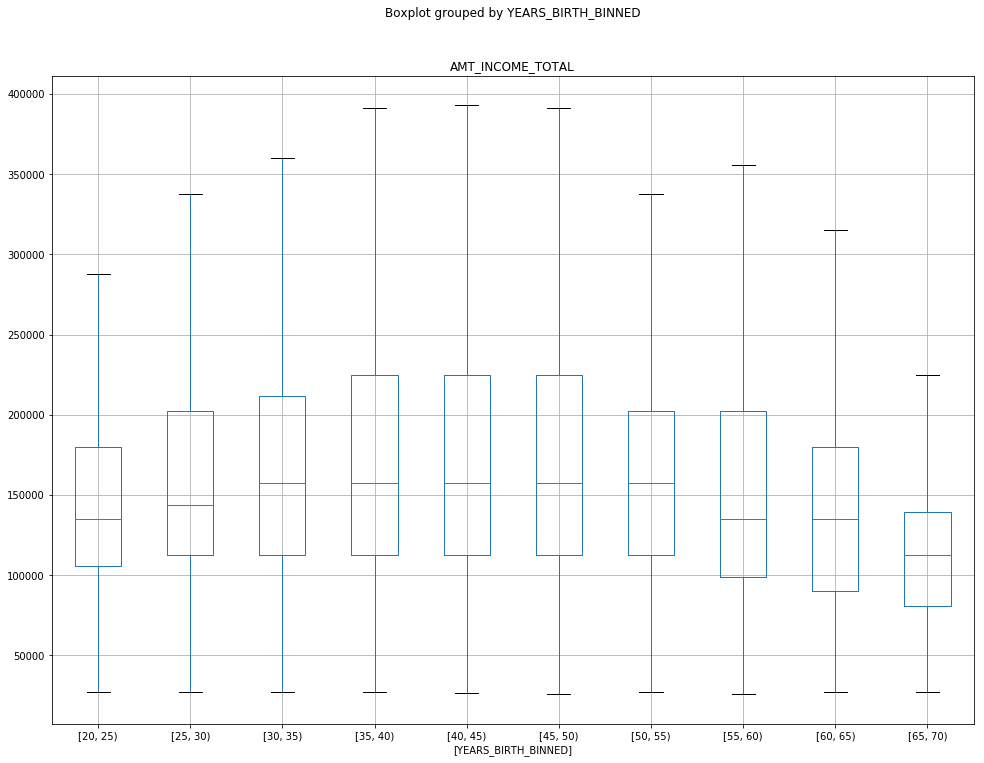

In [8]:
app_train.boxplot(column='AMT_INCOME_TOTAL', by=['YEARS_BIRTH_BINNED'], showfliers=False, figsize=(16, 12,))
plt.show()

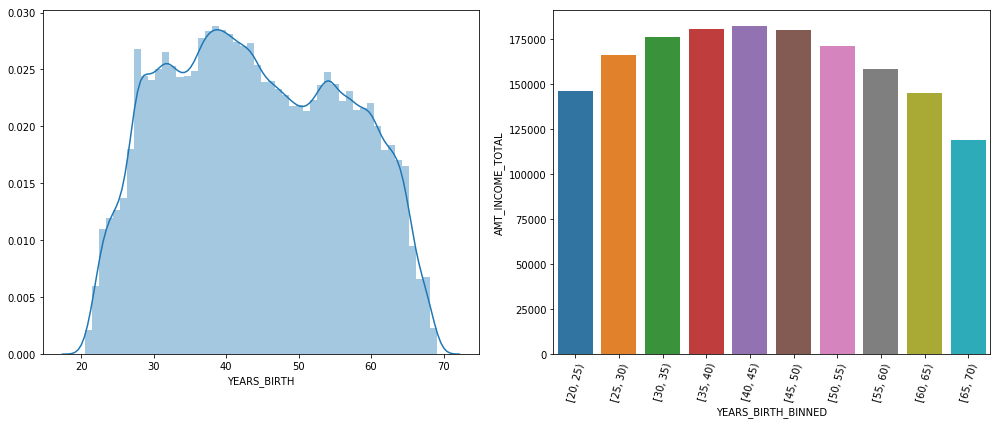

In [9]:
# app train means grouped by 'YEARS_BIRTH_BINNED' with target is 0
atm_wt0_group = app_train[app_train['TARGET'] == 0].groupby('YEARS_BIRTH_BINNED').mean()

figure, (ax1, ax2,) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6,))
sns.distplot(app_train[app_train['TARGET'] == 0]['YEARS_BIRTH'], ax=ax1)
sns.barplot(atm_wt0_group.index, atm_wt0_group['AMT_INCOME_TOTAL'], ax=ax2)
plt.sca(ax2)
plt.xticks(rotation=75)
figure.tight_layout()

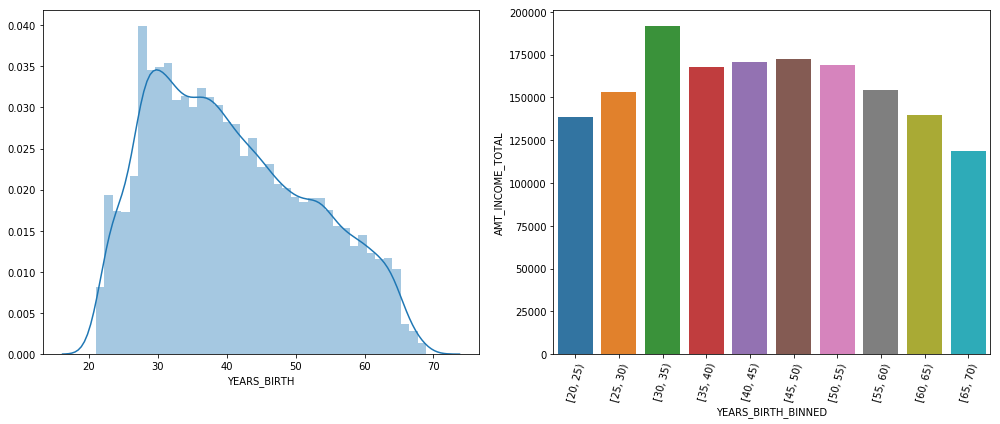

In [10]:
# app train means grouped by 'YEARS_BIRTH_BINNED' with target is 1
atm_wt1_group = app_train[app_train['TARGET'] == 1].groupby('YEARS_BIRTH_BINNED').mean()

figure, (ax1, ax2,) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6,))
sns.distplot(app_train[app_train['TARGET'] == 1]['YEARS_BIRTH'], ax=ax1)
sns.barplot(atm_wt1_group.index, atm_wt1_group['AMT_INCOME_TOTAL'], ax=ax2)
plt.sca(ax2)
plt.xticks(rotation=75)
figure.tight_layout()

In [11]:
# app train means grouped by 'YEARS_BIRTH_BINNED'
atm_group = app_train.groupby('YEARS_BIRTH_BINNED').mean()
atm_group['TARGET']

YEARS_BIRTH_BINNED
[20, 25)    0.123128
[25, 30)    0.111385
[30, 35)    0.102868
[35, 40)    0.089314
[40, 45)    0.078593
[45, 50)    0.074159
[50, 55)    0.066997
[55, 60)    0.055294
[60, 65)    0.052779
[65, 70)    0.037183
Name: TARGET, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

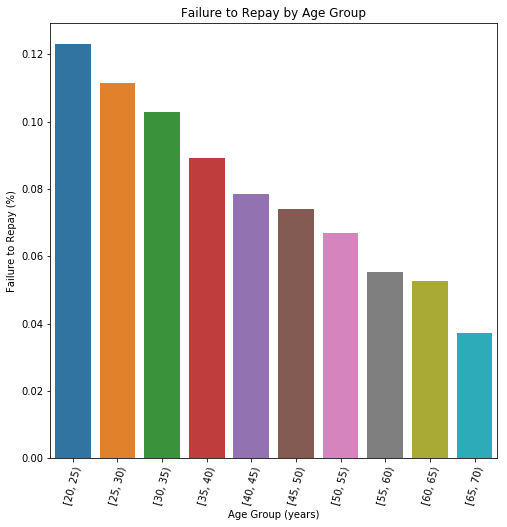

In [12]:
plt.figure(figsize=(8, 8,))
sns.barplot(atm_group.index, atm_group['TARGET'])
plt.title('Failure to Repay by Age Group'); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)');
plt.xticks(rotation=75)